# <center> Assignment1 </center>
StudentID: 22670287 <br></n>
StudentName: Xiaoyan Huang <br>
These code divided into two parts. <br> The first section is to define functions what we need to reproduce Genetic Algorithm to converge a target string "To be or not to be, that is a question." <br> The second section is to invoke functions and visualize the outcomes.



## 1.Define function



In [ ]:
def sen_generator(size, chars):
    return ''.join(random.choice(chars) for _ in range(size))

In [ ]:
# match with target to obtain the fitness scores
def get_scores(sentences):
    scores = {}
    for sen in range(0, len(sentences)):
        count = 0
        for char in range(0, len(list(target))):
            if sentences[sen][char] == target[char]:
                count = count + 1
            else:
                count = count
        scores[sen] = count/len(list(target)) * 100
    Scores = sorted(scores.items(), key=operator.itemgetter(1),reverse=True)
    return Scores

In [ ]:
# base on the fitness score to select individual which is more fitness
def selection(senScores, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(senScores), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = df.cum_sum/df.Fitness.sum()

    for ii in range(0, eliteSize):
        selectionResults.append(senScores[ii][0]) # get index
    
    for ii in range(0, len(senScores)-eliteSize):
        pick = random.random() 
        for tt in range(0, len(senScores)):
            if pick <= df.iat[tt,3]:
                selectionResults.append(senScores[tt][0])
                break
    return selectionResults

In [ ]:
# according to selection result, create a matingpool containing fitness individual
def matingPool(sentences, selectionResults):
    matingpool = []
    for ii in range(0, len(selectionResults)):
        index = selectionResults[ii]
        matingpool.append(sentences[index])
    return matingpool

In [ ]:
# crossover: breed the child based on a pair parent
def breed(p1, p2):
    child = [0] * len(p1)
    
    geneA = int(random.random() * len(p1))
    geneB = int(random.random() * len(p1))
    while geneA == geneB:
        geneB = int(random.random() * len(p1))
        break
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)
    for i in range(0,len(p1)):
        if i in range(startGene,endGene):
            child[i] = p2[i]
        else:
            child[i] = p1[i]
    child = "".join(child)
    return child

In [ ]:
# from mating pool, choose top20 elite and select parents from pool breeding
def reproduction(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize # 80
    pool = random.sample(matingpool, len(matingpool)) 

    for ii in range(0, eliteSize):
        children.append(matingpool[ii])
    for ii in range(0, length):
        child = breed(pool[ii], pool[len(matingpool)-ii-1]) # gene
        children.append(child)
    return children

In [ ]:
# mutation: select the random child based on mutation rate to mutate
def mutation2(children, mutationRate):
    for ii in range(0, len(children)):
        individual = list(children[ii])
        for ss in range(0, len(individual)):
            a = random.random()
            if (a < mutationRate):
                mut = int(random.random()*len(individual))
                b = target[int(random.random()*len(individual))]
                individual[mut] = b
                children[ii] = ''.join(individual)
                break
    return children

In [ ]:
# Combination function for nextGeneration: 1.get score 2.selection 3.matingpool
# 4.reproduction 5.mutation
def nextGeneration(currentGen, eliteSize, mutationRate):
    senScores = get_scores(currentGen)
    selectionResults = selection(senScores, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = reproduction(matingpool, eliteSize)
    NG = mutation2(children, mutationRate)
    # NG = mutation(NG, mutationRate)
    return NG

In [ ]:
# implement Genetic algorithm
def GA(eliteSize, mutationRate, generations):
    ## initialize the first generation
    chars = [char for char in string.ascii_letters]
    chars.append(' ')
    chars.append('.')
    sentences = []
    processScore=[]
    for ii in range(0, popmax):
        sentences.append(sen_generator(size=len(list(target)), chars=chars))
    processScore.append(get_scores(sentences)[0][1])
    
    ## reproduct the next generation
    for ii in range(0, generations):
        if ii % 10 == 0:
            print(ii)
        sentences = nextGeneration(sentences, eliteSize, mutationRate)
        currScore = get_scores(sentences)[0][1]
        processScore.append(currScore)
        if currScore == 100:
            break;
    bestIndex = get_scores(sentences)[0][0]
    best = sentences[bestIndex]
    return best, processScore

## 2.Genetic Algorithms

In [ ]:
import numpy as np, random, operator, pandas as pd 
import matplotlib.pyplot as plt
import string

In [ ]:
target = "To be, or not to be, that is the question."
# target = "To be "
popmax = 200
mutationRate = 0.05
eliteSize = 20
Maxgeneration = 1000

In [ ]:
chars = [char for char in string.ascii_letters]
chars.append(' ')
chars.append('.')
chars.append(',')

In [ ]:
best, processScore = GA(eliteSize, mutationRate=0.05, generations=Maxgeneration)

0
10
20
30
40
50
60
70
80
90


In [ ]:
print("this is the best-fit string: %s" % best)

this is the best-fit string: To be, or not to be, that is the question.


Text(0, 0.5, 'Max fitness for each generation')

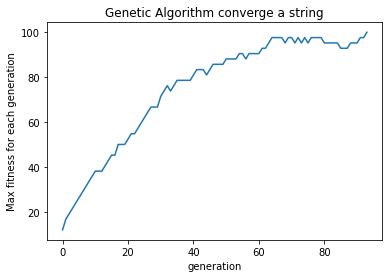

In [ ]:
import matplotlib.pyplot as plt
xaxis = [i for i in range(0, len(processScore))]
plt.plot(xaxis, processScore)
plt.title('Genetic Algorithm converge a string')
plt.xlabel("generation")
plt.ylabel("Max fitness for each generation")

From the results we could know roughly after 120 iterations, we get the best-fit target string!